In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
data = pd.read_csv('../data/penguins_cleaned.csv')

In [ ]:
data.drop(columns=['clutch_completion'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         342 non-null    object 
 1   island          342 non-null    object 
 2   date_egg        342 non-null    object 
 3   bill_length     342 non-null    float64
 4   bill_depth      342 non-null    float64
 5   flipper_length  342 non-null    float64
 6   body_mass       342 non-null    float64
 7   sex             342 non-null    object 
 8   del15           342 non-null    float64
 9   del13           342 non-null    float64
dtypes: float64(6), object(4)
memory usage: 26.8+ KB


In [ ]:
data.describe(include='all')

,species,island,date_egg,bill_length,bill_depth,flipper_length,body_mass,sex,del15,del13
count,342,342,342,342.000000,342.000000,342.000000,342.000000,342,342.000000,342.000000
unique,3,3,50,NaN,NaN,NaN,NaN,3,NaN,NaN
top,Adelie,Biscoe,2007-11-27,NaN,NaN,NaN,NaN,MALE,NaN,NaN
freq,151,167,18,NaN,NaN,NaN,NaN,168,NaN,NaN
mean,NaN,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,8.737470,-25.691198
std,NaN,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.544081,0.781763
min,NaN,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,7.632200,-27.018540
25%,NaN,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,8.303020,-26.295280
50%,NaN,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,8.670170,-25.804194
75%,NaN,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,9.147428,-25.081043


# 1. Exploration de données

## 1.1 Convertion de types des variables

In [ ]:
data.dtypes

species            object
island             object
date_egg           object
bill_length       float64
bill_depth        float64
flipper_length    float64
body_mass         float64
sex                object
del15             float64
del13             float64
dtype: object

In [ ]:
for c in data.columns:
    if data[c].dtype == 'O':
        data[c] = data[c].astype('category')

## 1.2 Analyse univariée

### 1.2.1 Variables numériques

In [ ]:
data.columns

Index(['species', 'island', 'date_egg', 'bill_length', 'bill_depth',
       'flipper_length', 'body_mass', 'sex', 'del15', 'del13'],
      dtype='object')

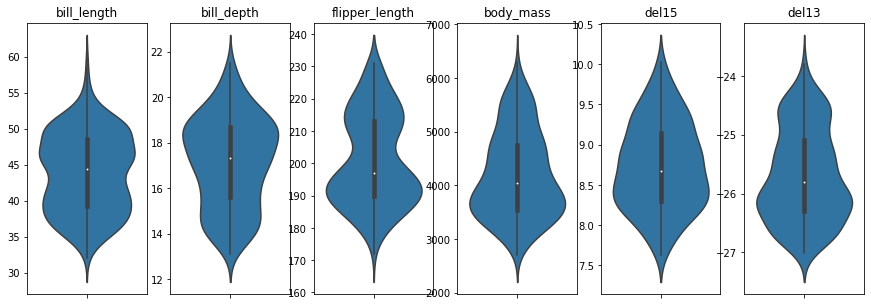

In [ ]:
cols = ['bill_length','bill_depth', 'flipper_length', 'body_mass','del15', 'del13']
#cols = ['bill_length','bill_depth', 'flipper_length', 'body_mass']
fig1, axes1 = plt.subplots(ncols=len(cols), nrows=1,figsize=(15,5))
for i in range(len(cols)):
    sns.violinplot(y=data[cols[i]],ax=axes1[i]).set(ylabel=None,title=cols[i])

### 1.2.2 Variables catégoriques

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


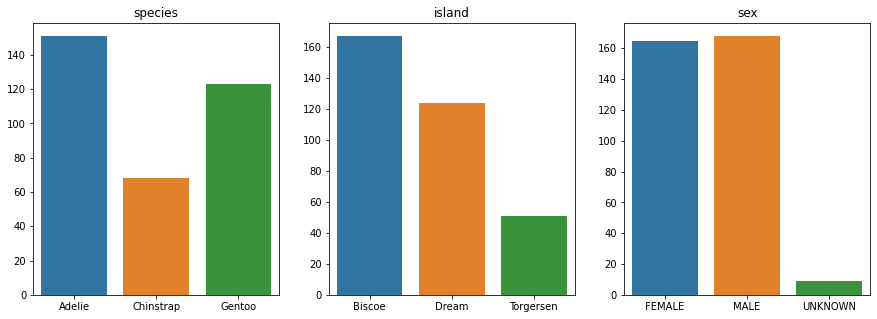

In [ ]:
cols = ['species', 'island','sex']
fig2, axes2 = plt.subplots(ncols=len(cols), nrows=1,figsize=(15,5))

for i in range(len(cols)):
    sns.countplot(data[cols[i]],ax=axes2[i]).set(ylabel=None,xlabel=None,title=cols[i])

Nous avons une jeu de données déséquilibré au niveu des espèces. Les Adelies et les Gentoos appraissent plus souvent que les Chinstraps, on pourra prendre en compte cette information.

## 1.3 Analyse multivariée

### 1.2.1 Variables quantitatives

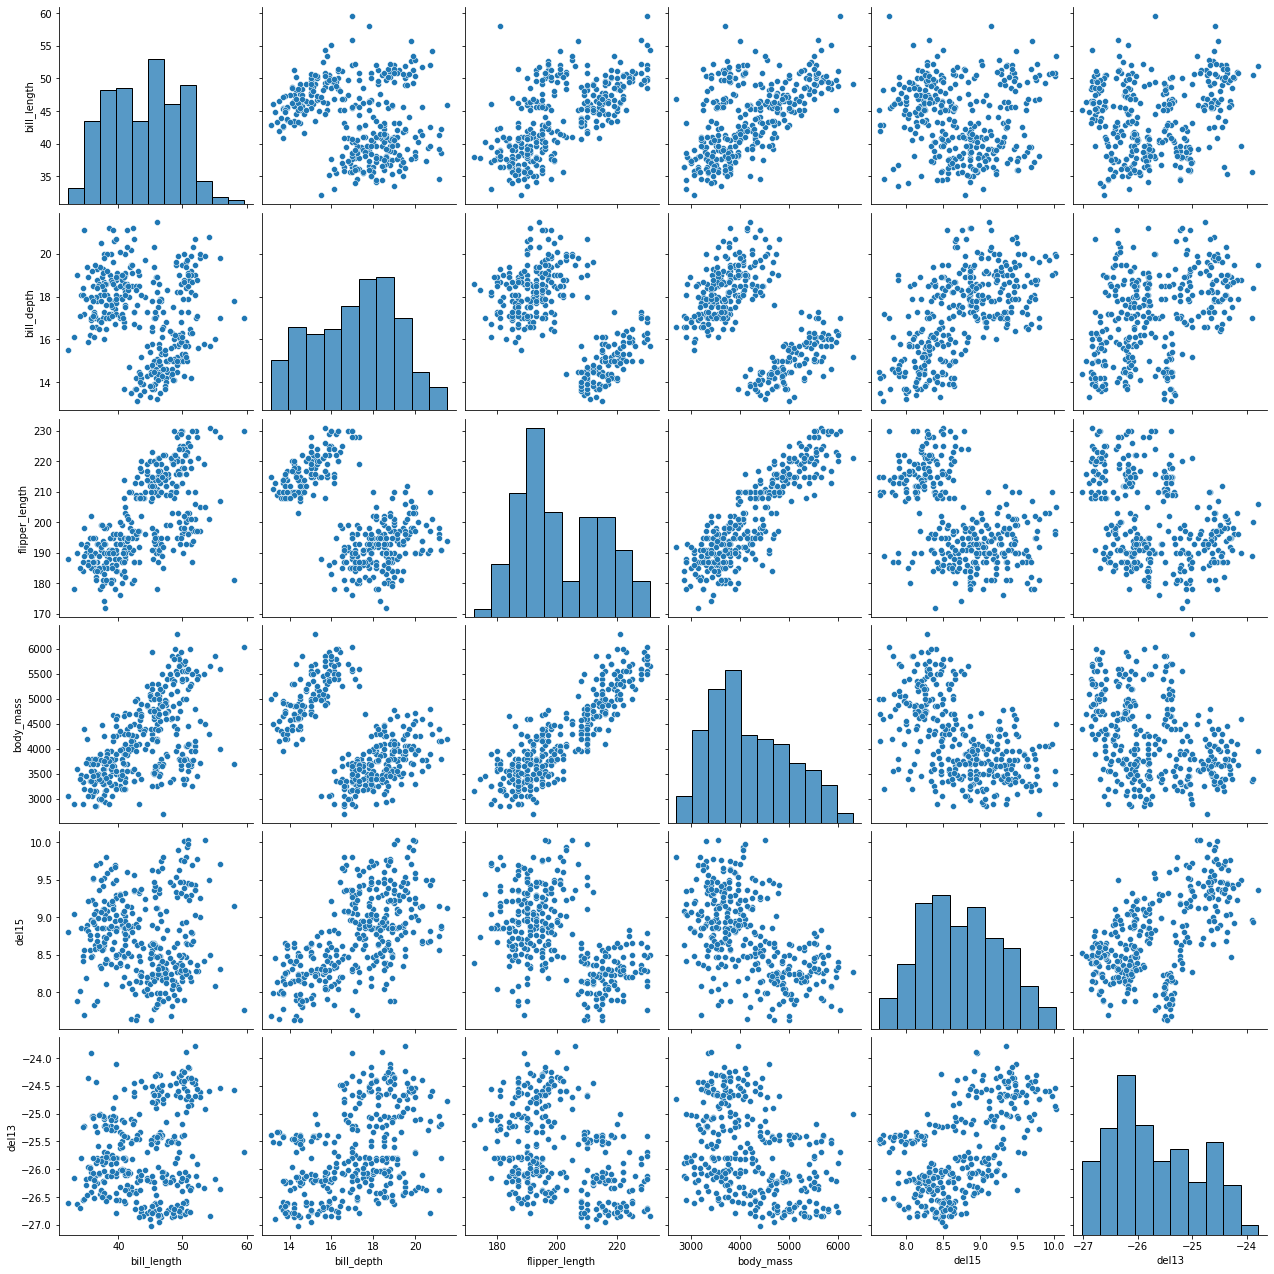

In [ ]:
sns.pairplot(data,height=3)

<AxesSubplot:>

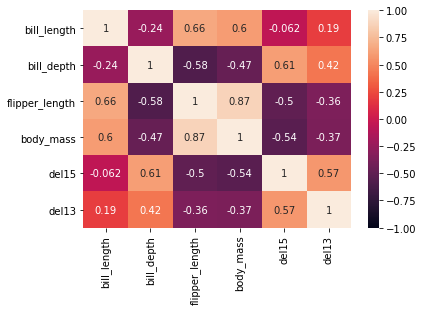

In [ ]:
corr = data.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

On peut constater le poid et la longeur d'aile sont fortement et positivement corrélées, et les relations linéaires peuvent être vues dans la plupart des graphiques. 

In [ ]:
def getFigureAtPos(**kwargs):
    data = kwargs["data"]
    plotFunc = kwargs["plotFunc"]
    i = kwargs["i"]
    j = kwargs["j"]
    title = kwargs["title"]
    try:
        cols = kwargs["cols"]
        plotFunc(data[cols[i]],hue=data[cols[j]]).set(ylabel=None,xlabel=None,title=title)
    except:
        try:
            cols1 = kwargs["cols1"]
            cols2 = kwargs["cols2"]
            plotFunc(x=data[cols1[i]],y=data[cols2[j]]).set(title=title)
        except:    
            pass
    
    

### 1.3.2 Variables qualitatives

In [ ]:
cols = ['species', 'island', 'clutch_completion','sex']
# fig3, axes3 = plt.subplots(ncols=4, nrows=4,figsize=(20,10))
# fig3.tight_layout(pad=3.0)
# for i in range(len(cols)):
#     for j in range(len(cols)):
#         sns.countplot(data[cols[i]],ax=axes3[j,i],hue=data[cols[j]]).set(ylabel=None,xlabel=None,title=cols[i])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


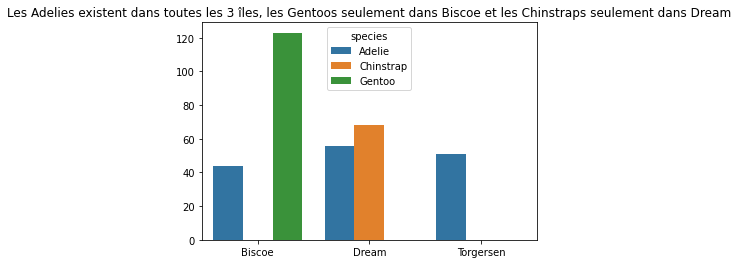

In [ ]:
getFigureAtPos(**{
    'plotFunc':sns.countplot,
    'data':data,
    'cols':cols,
    'j':0,
    'i':1,
    'title':'Les Adelies existent dans toutes les 3 îles, les Gentoos seulement dans Biscoe et les Chinstraps seulement dans Dream'})

### 1.3.3 Variables mixes

In [ ]:
# cols1 = ['species', 'island','sex']
# cols2 = ['bill_length','bill_depth', 'flipper_length', 'body_mass']
# # cols2 = ['bill_length','bill_depth', 'flipper_length', 'body_mass','del15', 'del13']
# fig4, axes4 = plt.subplots(ncols=len(cols1), nrows=len(cols2),figsize=(20,20))
# fig4.tight_layout(pad=3.0)
# hue = "sex"
# for i in range(len(cols1)):
#     for j in range(len(cols2)):
#         if cols1[i] != hue and hue:
#             sns.boxplot(x=data[cols1[i]],y=data[cols2[j]],ax=axes4[j,i],hue=data[hue])
#         else:
#             sns.boxplot(x=data[cols1[i]],y=data[cols2[j]],ax=axes4[j,i])

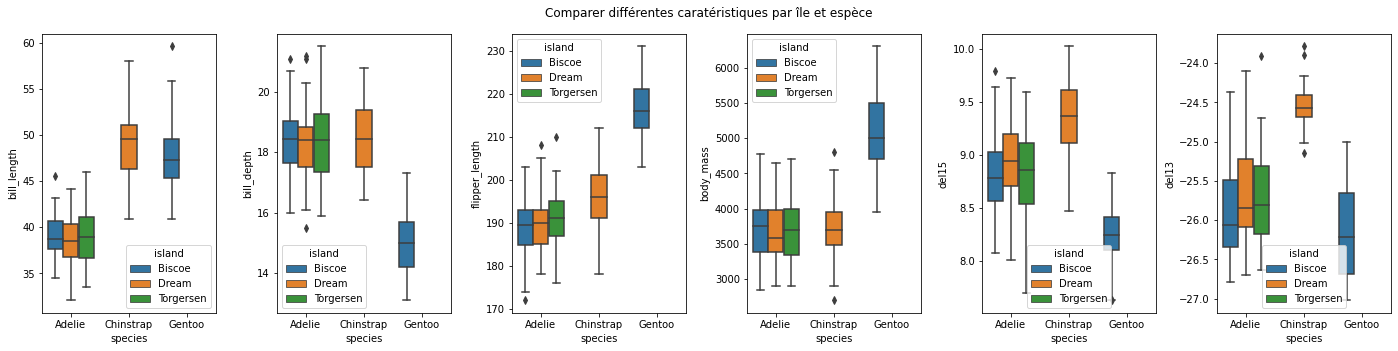

In [ ]:
cols1 = ['species', 'island','sex']
#cols2 = ['bill_length','bill_depth', 'flipper_length', 'body_mass']
cols2 = ['bill_length','bill_depth', 'flipper_length', 'body_mass','del15', 'del13']
fig4, axes4 = plt.subplots(ncols=len(cols2), nrows=1,figsize=(20,5))
fig4.tight_layout(pad=3.0)
fig4.suptitle("Comparer différentes caratéristiques par île et espèce")
hue = "island"
i = 0
for j in range(len(cols2)):
    if cols1[i] != hue and hue:
        sns.boxplot(x=data[cols1[i]],y=data[cols2[j]],ax=axes4[j],hue=data[hue])
    else:
        sns.boxplot(x=data[cols1[i]],y=data[cols2[j]],ax=axes4[j])

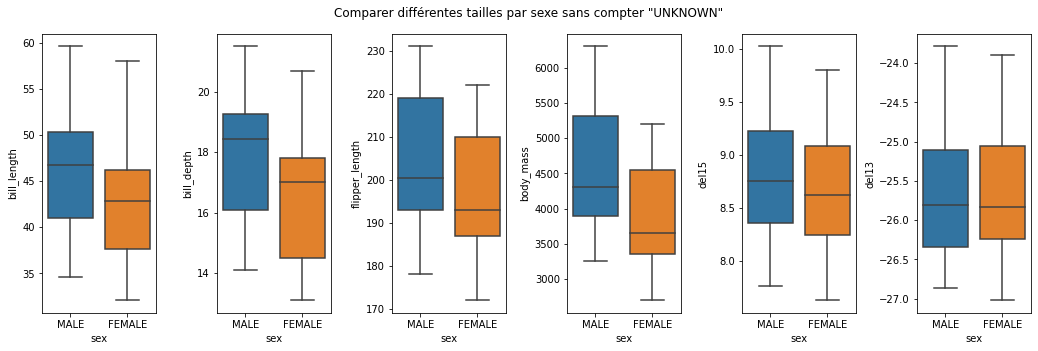

In [ ]:
#cols2 = ['bill_length','bill_depth', 'flipper_length', 'body_mass']
cols2 = ['bill_length','bill_depth', 'flipper_length', 'body_mass','del15', 'del13']
fig4, axes4 = plt.subplots(ncols=len(cols2), nrows=1,figsize=(15,5))
fig4.tight_layout(pad=3.0)
fig4.suptitle("Comparer différentes tailles par sexe sans compter \"UNKNOWN\"")
data_temp = data[data["sex"]!="UNKNOWN"]
for j in range(len(cols2)):
    sns.boxplot(x=data_temp["sex"].cat.set_categories(data_temp["sex"].unique()),y=data_temp[cols2[j]],ax=axes4[j])

On peut constater que :
- Les Chinstraps et Gentoos ont le bec le plus longue
- Les Adelies et Gentoos ont le bec le plus profond
- Les Gentoos sont les plus lourds

De plus :
- Les Adelies qui habitent dans les 3 îles ont les tailles similaires
- Les mâles ont la taille plus grandes que les femelles

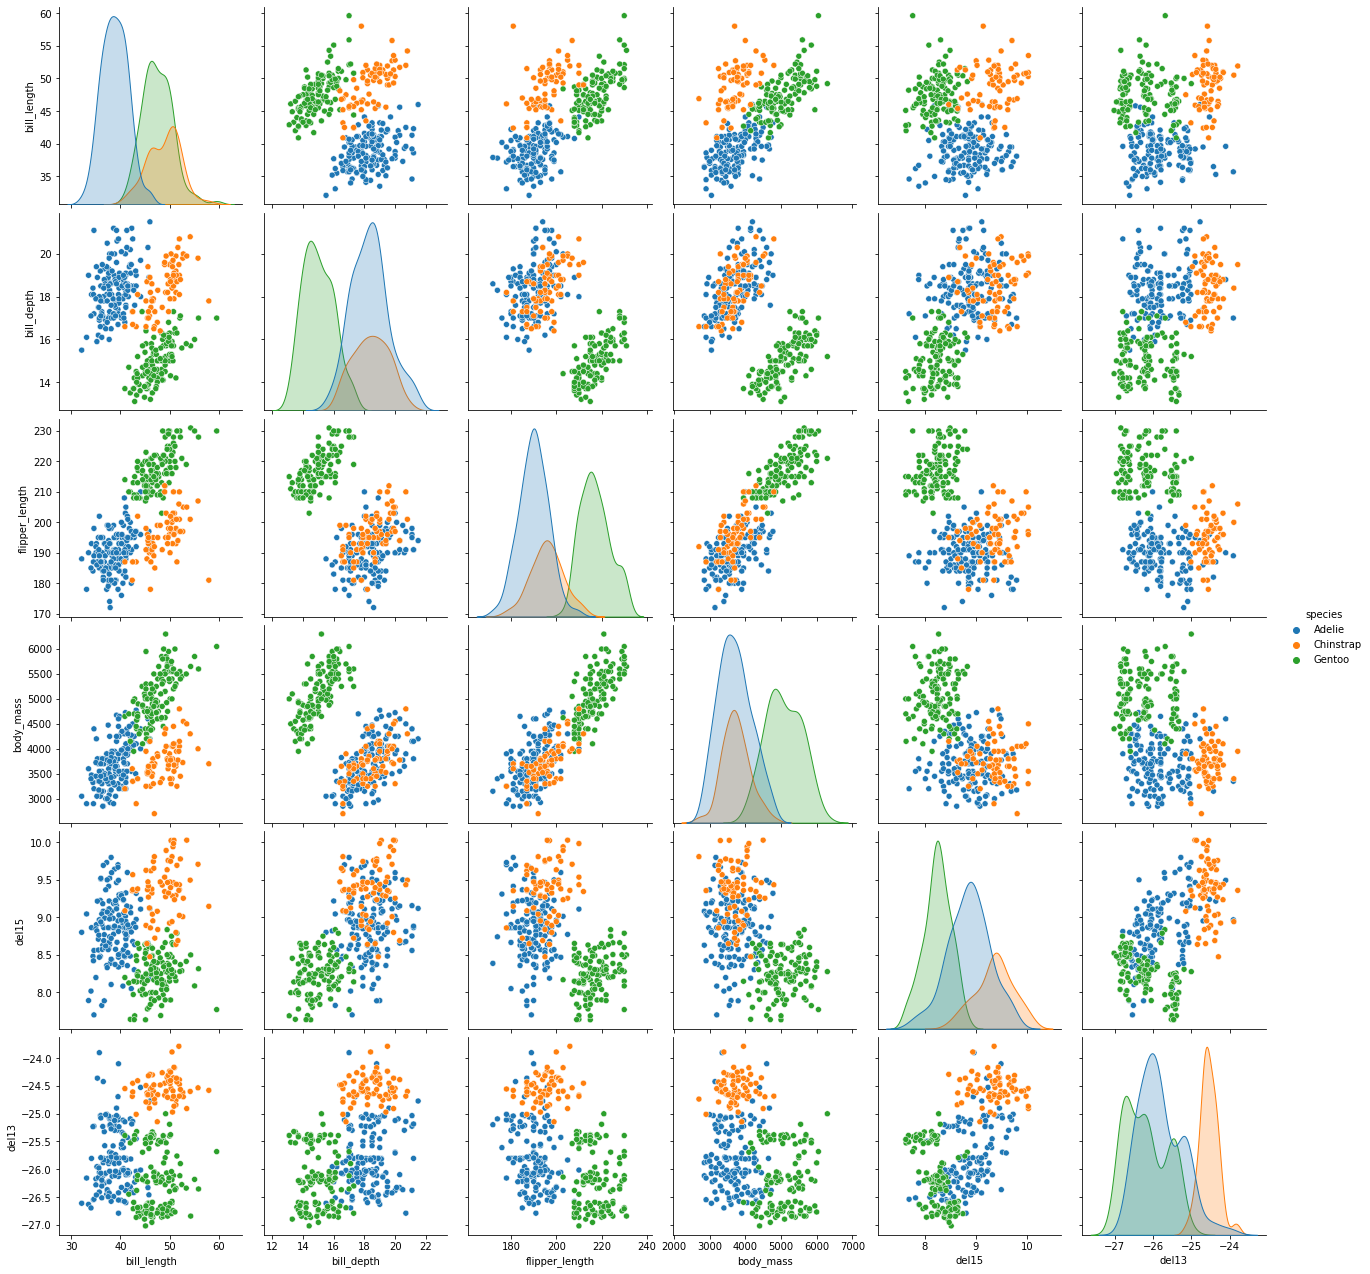

In [ ]:
sns.pairplot(data,hue="species",height=3)

A première vue, nous pouvons distinguer à peu près les espèce de pingouin en regardant les combinaisons bill_length/flipper_length et bill_length/bill_depth

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1dd35576-464a-4d46-a0e6-752fc35b7463' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>